In [10]:
import pandas as pd
# 超参数
COLS_Y = '下期百位是8'
COLS_Y_CLASSNAME = ["不是8", "是8"]
COLS_ALL = ['号码1','号码1奇偶','号码2','号码2奇偶','号码3','号码3奇偶','跨度','和值',COLS_Y]
#133 组三
#135 组六
# 独胆 123 ->   3
# 杀号

# 读取excel文件并获取指定列dataframe
df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx', usecols=COLS_ALL)
# df = pd.read_excel('..\Data\福彩3D历史开奖.xlsx')
df = df[:200]
print(df)

     号码1  号码1奇偶  号码2  号码2奇偶  号码3  号码3奇偶  下期百位是8  跨度  和值
0      8      0    1      1    6      0   False   7  15
1      9      1    5      1    5      1    True   4  19
2      8      0    1      1    3      1   False   7  12
3      2      0    5      1    6      0    True   4  13
4      5      1    3      1    6      0   False   3  14
..   ...    ...  ...    ...  ...    ...     ...  ..  ..
195    0      0    9      1    0      0   False   9   9
196    9      1    2      0    0      0   False   9  11
197    0      0    4      0    7      1   False   7  11
198    2      0    2      0    6      0   False   4  10
199    4      0    9      1    1      1   False   8  14

[200 rows x 9 columns]


In [11]:
from sklearn.model_selection import train_test_split

## 取需要训练的值
cols_x = df.drop(columns=COLS_Y)
# print(cols_x)
cols_y = df[COLS_Y]
# print(cols_y)
cols_x_names = cols_x.columns.tolist()

Xtrain, Xtest, Ytrain, ytest = train_test_split(cols_x, cols_y, test_size = 0.2, random_state=102) 

print(Xtrain.shape)
print(Xtest.shape)



(160, 8)
(40, 8)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# 训练模型
clf = RandomForestClassifier(n_estimators=100,  max_depth = 4, random_state = 59)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
clf = clf.fit(Xtrain, Ytrain) 

# 预测测试集
y_pred = clf.predict(Xtest)

# 评估模型
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))


#print('精准度： '+str(clf.score(Xtest, ytest))) #返回预测的准确度
#print([*zip(feature_name,clf.feature_importances_)]) #返回决策树各自变量的重要程度

Accuracy: 0.875
              precision    recall  f1-score   support

       False       0.88      1.00      0.93        35
        True       0.00      0.00      0.00         5

    accuracy                           0.88        40
   macro avg       0.44      0.50      0.47        40
weighted avg       0.77      0.88      0.82        40



e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


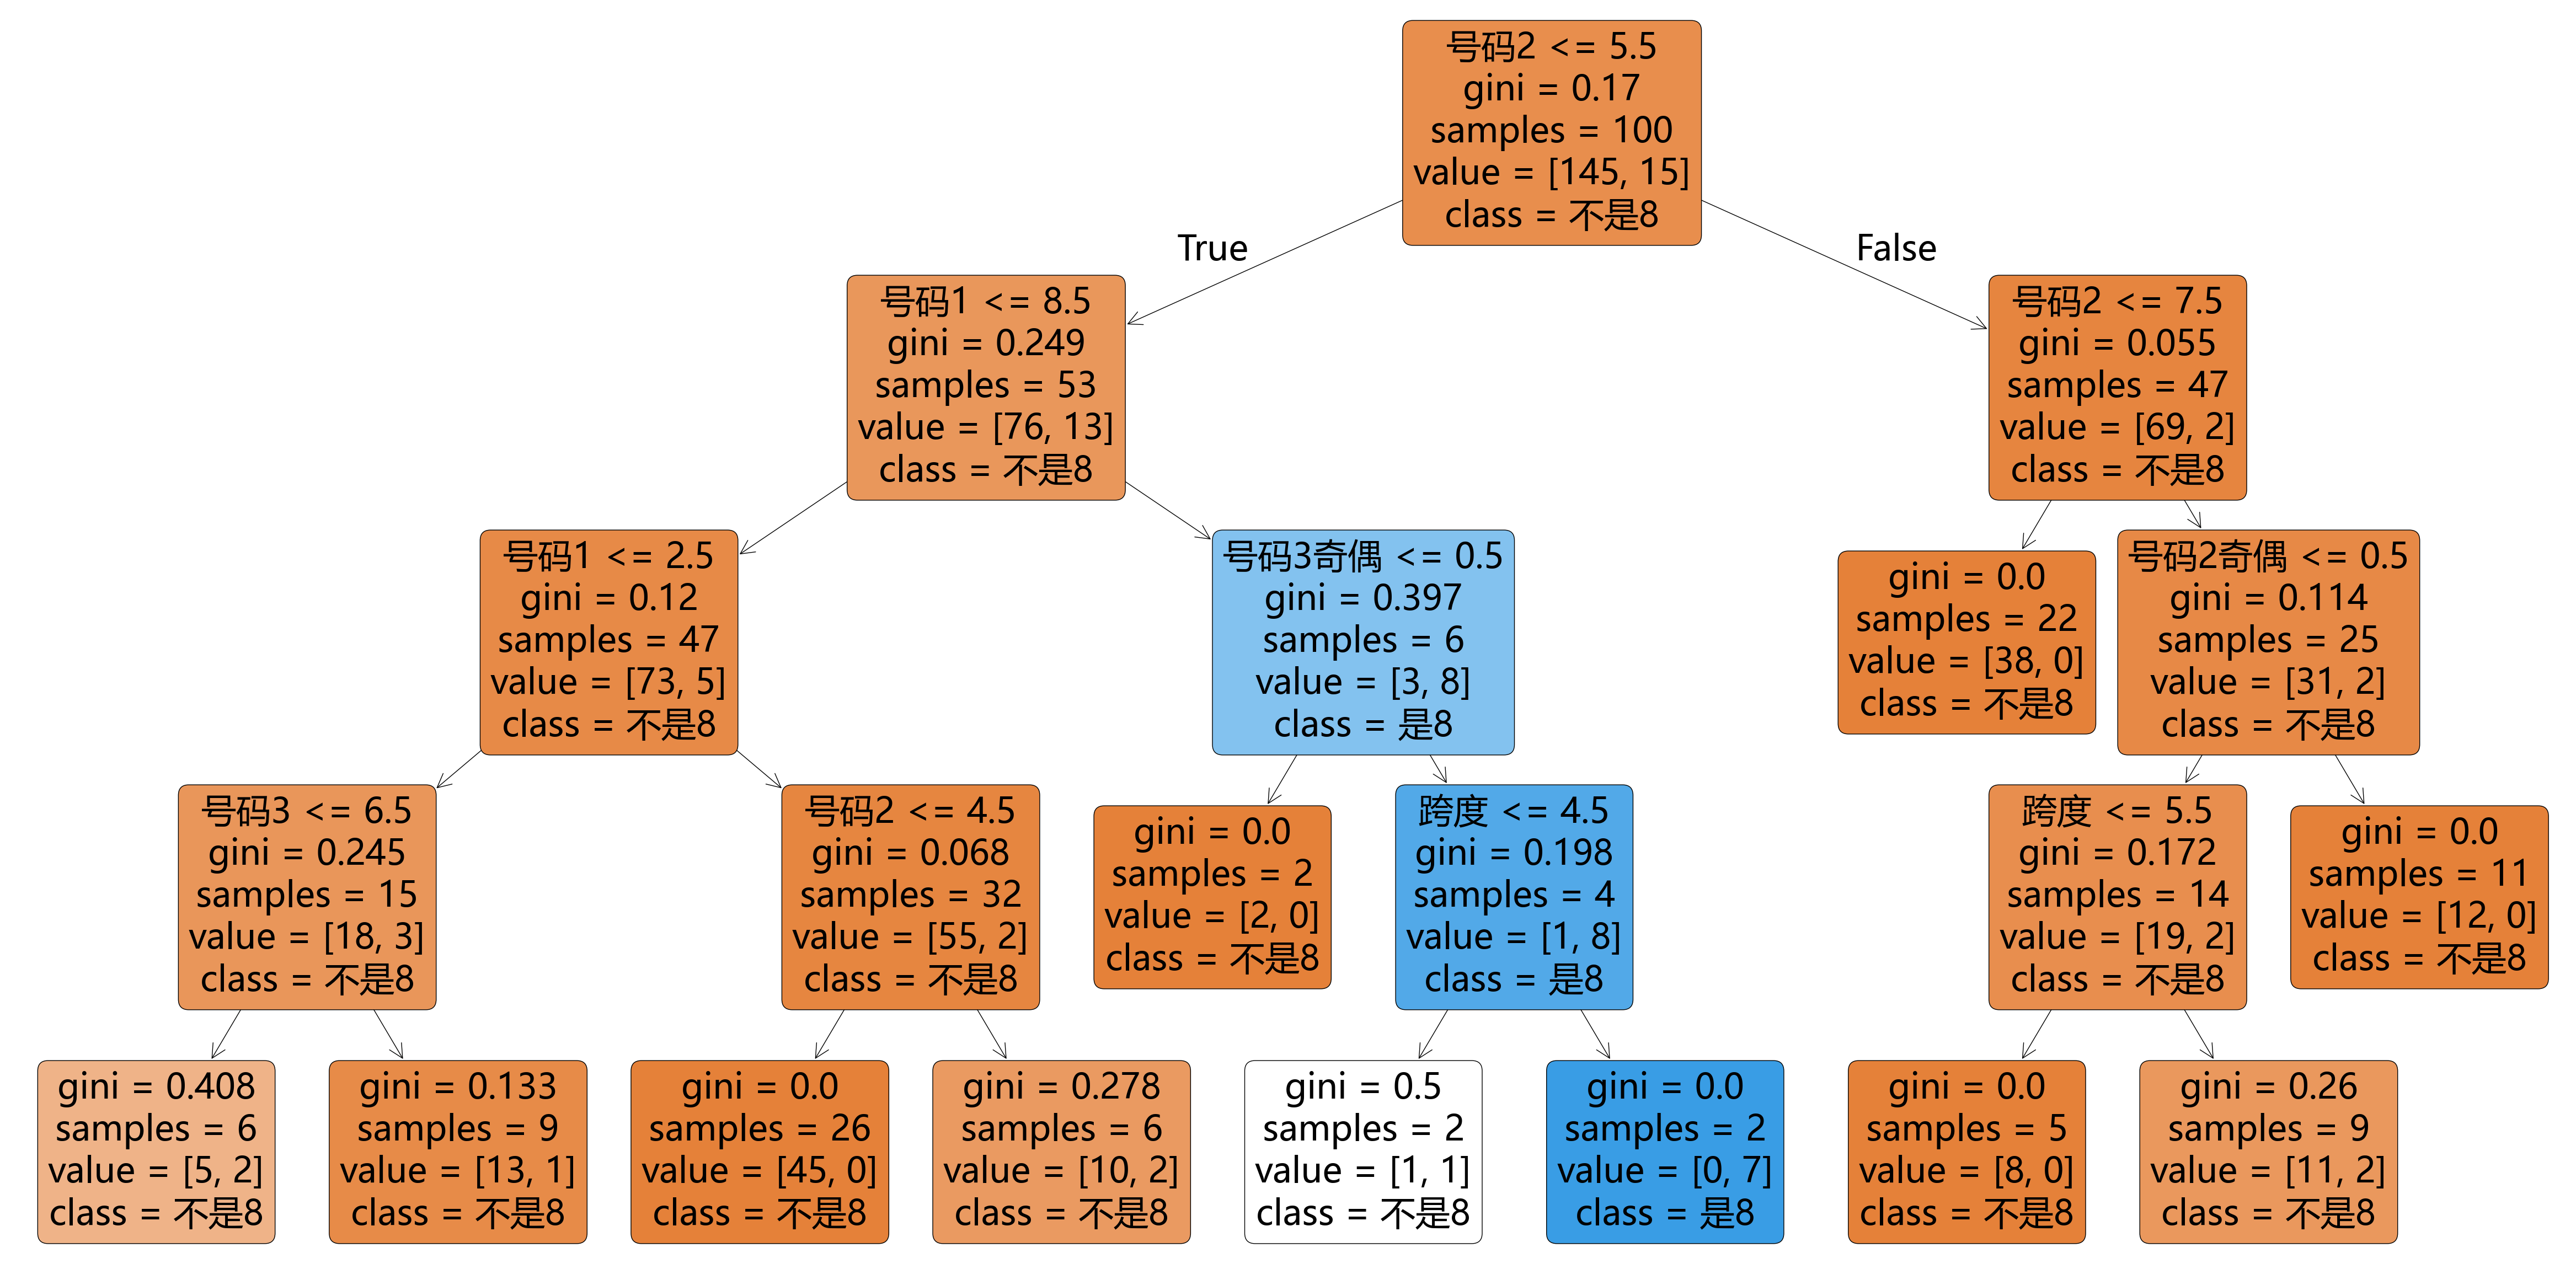

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 选择森林中的一棵树进行绘制
tree_num = 7  # 选择第n棵树
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 更好的中文字体，可以显示“-”号
plt.figure(figsize=(60,30))
plot_tree(clf.estimators_[tree_num], 
          feature_names=cols_x_names,
          class_names=COLS_Y_CLASSNAME, 
          filled=True, 
          rounded=True)
plt.show()